In [3]:
import numpy as np
import pandas
import pandas as pd


from ISLP import load_data
from sympy.stats import Logistic


# Get Data


In [4]:
Data = load_data("Weekly")

Data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


# Graphs and statistics

In [5]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


## Histograms

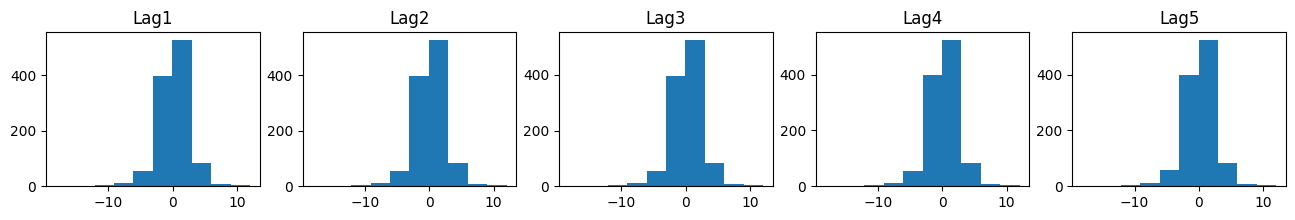

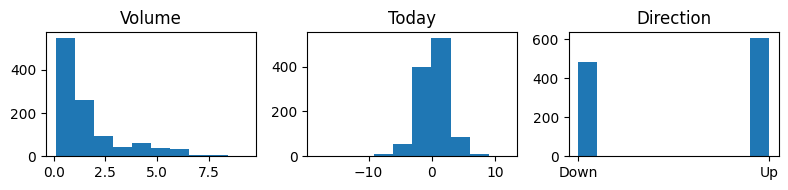

In [6]:
lag = ["Lag1", "Lag2", "Lag3","Lag4","Lag5"]
up = plt.subplots(1,5, figsize=(16,2))[1]

for idx, l in enumerate(lag):
    ax = up[idx]
    ax.set_title(l)
    ax.hist(Data[l], label=l)


down = plt.subplots(1,3, figsize=(8,2))[1]
ax = down[0]
ax.set_title("Volume")
ax.hist(Data["Volume"])

ax = down[1]
ax.set_title("Today")
ax.hist(Data["Today"])

ax = down[2]
ax.set_title("Direction")
ax.hist(Data["Direction"])

plt.tight_layout()
plt.show()

## Scatter Matrix

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Lag1', ylabel='Year'>,
        <Axes: xlabel='Lag2', ylabel='Year'>,
        <Axes: xlabel='Lag3', ylabel='Year'>,
        <Axes: xlabel='Lag4', ylabel='Year'>,
        <Axes: xlabel='Lag5', ylabel='Year'>,
        <Axes: xlabel='Volume', ylabel='Year'>,
        <Axes: xlabel='Today', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Lag1'>,
        <Axes: xlabel='Lag1', ylabel='Lag1'>,
        <Axes: xlabel='Lag2', ylabel='Lag1'>,
        <Axes: xlabel='Lag3', ylabel='Lag1'>,
        <Axes: xlabel='Lag4', ylabel='Lag1'>,
        <Axes: xlabel='Lag5', ylabel='Lag1'>,
        <Axes: xlabel='Volume', ylabel='Lag1'>,
        <Axes: xlabel='Today', ylabel='Lag1'>],
       [<Axes: xlabel='Year', ylabel='Lag2'>,
        <Axes: xlabel='Lag1', ylabel='Lag2'>,
        <Axes: xlabel='Lag2', ylabel='Lag2'>,
        <Axes: xlabel='Lag3', ylabel='Lag2'>,
        <Axes: xlabel='Lag4', ylabel='Lag2'>,
        <Axes: xlabel='Lag

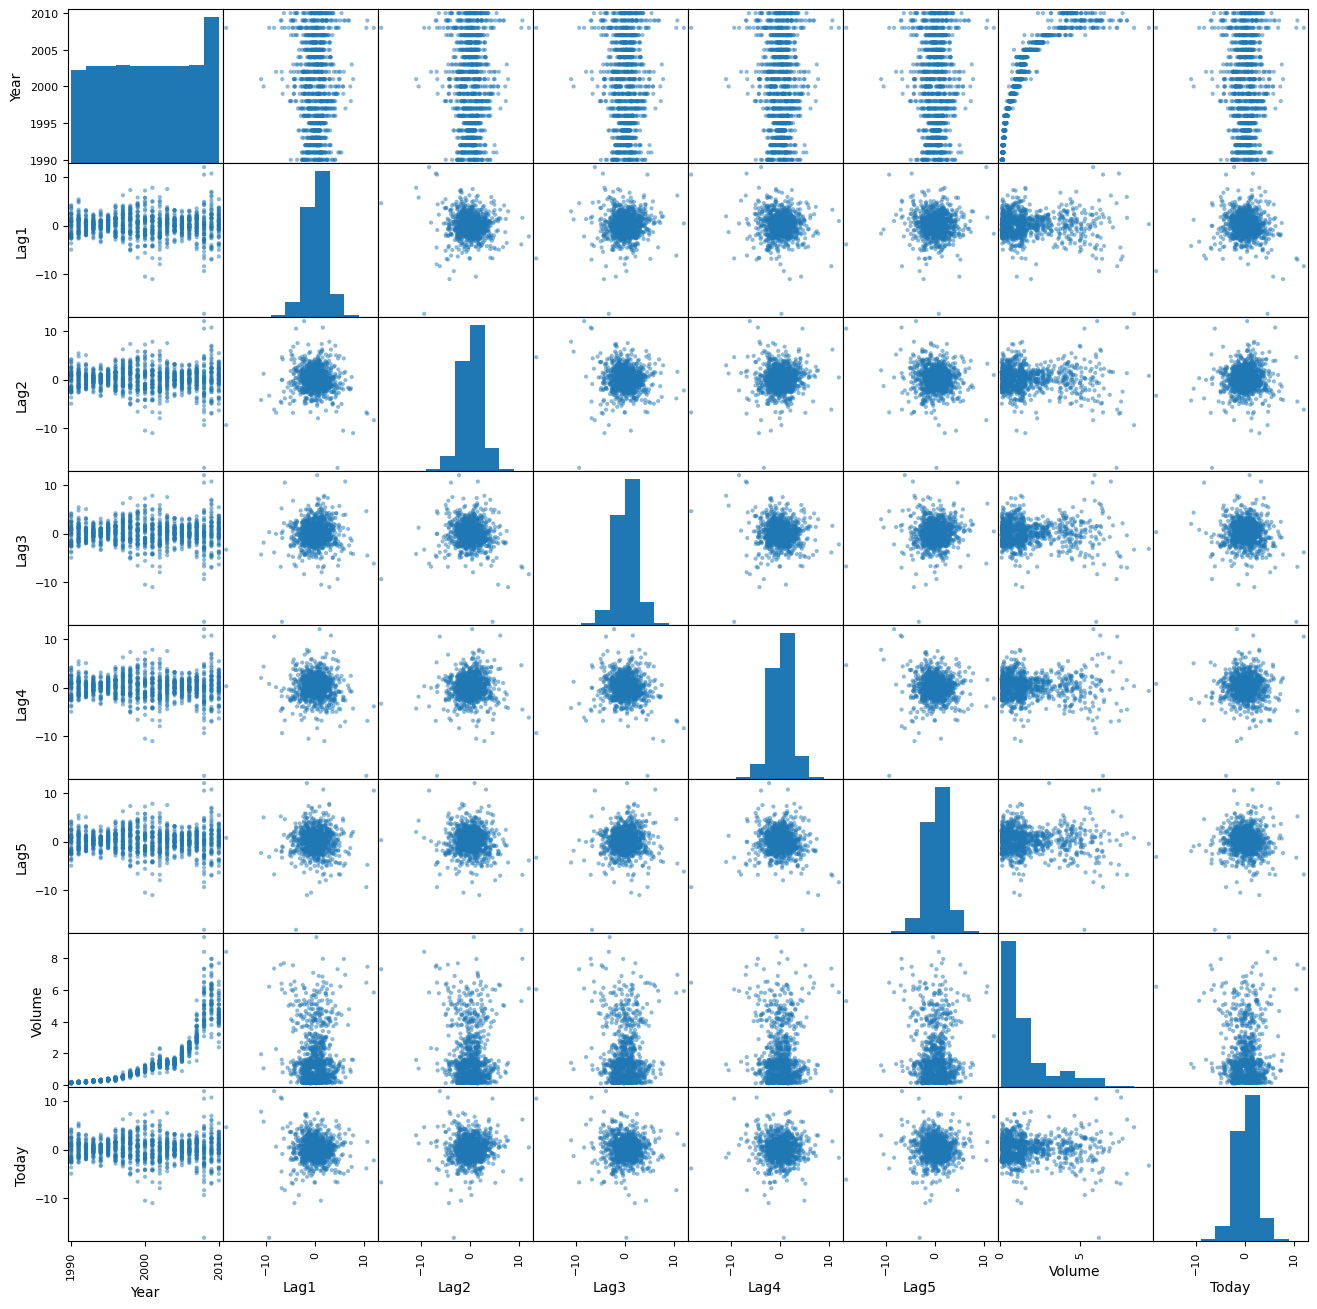

In [7]:
scatter_matrix(Data, figsize=(16,16))

## Correlation

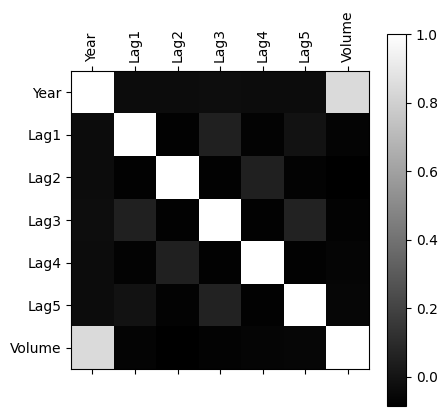

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000


In [8]:
names = Data.columns[:7]
corr_mtx = (Data[names]).corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.show()

corr_mtx

# Logistic Regression


## Imports

In [21]:
import statsmodels.api as sm
from ISLP.models import summarize

## Mode Training
We want to predict if Up

In [30]:
pred_names = ["Volume", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]

X = Data[pred_names]
y = np.array([1 if x=='Up' else 0 for x in Data['Direction']]) #Map Y to 0 and 1


model = sm.GLM(y, X,
             family=sm.families.Binomial())

results = model.fit()
summarize(results)

,coef,std err,z,P>|z|
Volume,0.0569,0.027,2.125,0.034
Lag1,-0.0327,0.026,-1.250,0.211
Lag2,0.0682,0.027,2.556,0.011
Lag3,-0.0081,0.026,-0.306,0.759
Lag4,-0.0194,0.026,-0.740,0.459
Lag5,-0.0069,0.026,-0.261,0.794
